In [9]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

In [10]:
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())

In [11]:
negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

In [12]:
def strip_punctuation(word):
    for letter in word:
        if letter in punctuation_chars:
            word = word.replace(letter, '')
    return word

In [13]:
def get_pos(string):
    words = string.split(" ")
    nwords = []
    
    for word in words:
        nwords.append(strip_punctuation(word))
    
    p_counter = 0
    for word in nwords:
        if word.lower() in positive_words:
            p_counter += 1
    return p_counter

In [14]:
def get_neg(string):
    words = string.split(" ")
    nwords = []
    
    for word in words:
        nwords.append(strip_punctuation(word))
   
    n_counter = 0
    for word in nwords:
        if word.lower() in negative_words:
            n_counter += 1
    return n_counter

In [15]:
resulting_list = []
twitter_data = open('project_twitter_data.csv', 'r')
lines = twitter_data.readlines()
headers = lines[0].split(',')
for tweet_info in lines[1:]:
    values = tweet_info.split(',')
    p = get_pos(values[0])
    n = get_neg(values[0])
    
    values[2] = values[2].replace('\n', '')
    resulting_list.append((int(values[1]), 
                           int(values[2]), 
                           p, n, 
                           p-n))
twitter_data.close()

In [16]:
results = open('resulting_data.csv', 'w')
results.write('Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score')
results.write('\n')
for tweet_info in resulting_list:
    tweet_data = '{}, {}, {}, {}, {}'.format(tweet_info[0], 
                                             tweet_info[1],
                                             tweet_info[2], 
                                             tweet_info[3], 
                                             tweet_info[4])
    results.write(tweet_data)
    results.write('\n')

results.close()

In [18]:
import matplotlib.pyplot as plt

In [20]:
x_NetScore = [ info[-1] for info in resulting_list ]
y_Retweets = [ info[0] for info in resulting_list ]

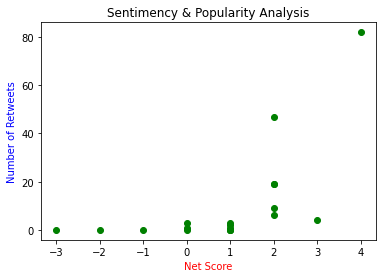

In [31]:
plt.scatter(x_NetScore, y_Retweets, color = 'g')
plt.title('Sentimency & Popularity Analysis')
plt.xlabel('Net Score', color = 'r')
plt.ylabel('Number of Retweets', color = 'blue')
plt.show()